In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train_E1GspfA.csv')
test=pd.read_csv('test_6QvDdzb.csv')

In [3]:
train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [4]:
train.describe(include=object)

,date
count,18247
unique,895
top,2021-02-28
freq,24


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [6]:
train.head(5)

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [7]:
#checking null values in train data
print('Null values in Train data')
print(train.isna().sum())


Null values in Train data
date      0
hour      0
demand    0
dtype: int64


In [8]:
#checking null values test data
print('Null values in Test data')
print(test.isna().sum())

Null values in Test data
date    0
hour    0
dtype: int64


In [9]:
# Checking duplicate Values
print('Duplicates in train data:'+str(train.duplicated().sum()))
print('Duplicates in test data:'+str(test.duplicated().sum()))

Duplicates in train data:0
Duplicates in test data:0


In [10]:
# Checking Unique Values
train.nunique()

date      895
hour       24
demand    296
dtype: int64

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='hour', ylabel='Count'>

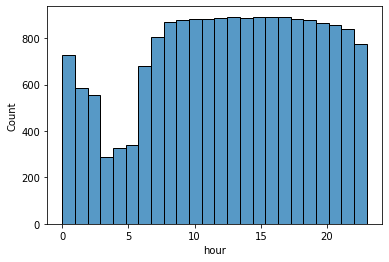

In [11]:
sns.histplot(train['hour'],bins=24)

<AxesSubplot:xlabel='demand', ylabel='Count'>

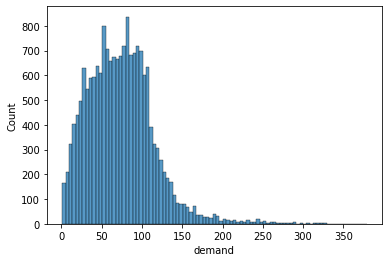

In [12]:
sns.histplot(train['demand'])

<AxesSubplot:xlabel='demand'>

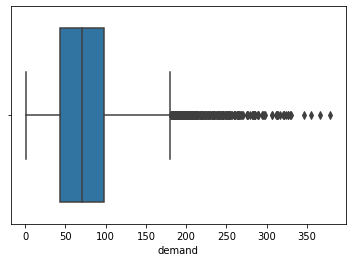

In [13]:
sns.boxplot(train['demand'])

## Outlier treatment

In [14]:
#outlier cutoff using IQR
train['demand'].quantile(0.978)

173.58799999999974

In [15]:
train.shape

(18247, 3)

In [16]:
# Removing data greater than 175
train=train[train['demand']<=175]

In [17]:
train.shape

(17860, 3)

In [18]:
# Converting data to datetime object
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [19]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17860 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17860 non-null  datetime64[ns]
 1   hour    17860 non-null  int64         
 2   demand  17860 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 558.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7650 non-null   datetime64[ns]
 1   hour    7650 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 119.7 KB
None None


In [20]:
# Sorting data based on date and hour
train.sort_values(by=['date','hour'], axis=0, ascending=True, inplace=True)
test.sort_values(by=['date','hour'], axis=0, ascending=True, inplace=True)

In [21]:
# converting date as index
train = train.set_index('date')
test = test.set_index('date')

## Feature Extraction 

In [22]:
train['dow'] = train.index.dayofweek
train['doy'] = train.index.dayofyear
train['year'] = train.index.year
train['month'] = train.index.month
train['quarter'] = train.index.quarter
train['woy'] = train.index.weekofyear
train['dom'] = train.index.day 


In [23]:
test['dow'] = test.index.dayofweek
test['doy'] = test.index.dayofyear
test['year'] = test.index.year
test['month'] = test.index.month
test['quarter'] = test.index.quarter
test['woy'] = test.index.weekofyear
test['dom'] = test.index.day 

In [24]:
print(train.head())
print(test.head())

            hour  demand  dow  doy  year  month  quarter  woy  dom
date                                                              
2018-08-18     9      91    5  230  2018      8        3   33   18
2018-08-18    10      21    5  230  2018      8        3   33   18
2018-08-18    13      23    5  230  2018      8        3   33   18
2018-08-18    14     104    5  230  2018      8        3   33   18
2018-08-18    15      81    5  230  2018      8        3   33   18
            hour  dow  doy  year  month  quarter  woy  dom
date                                                      
2021-03-01     0    0   60  2021      3        1    9    1
2021-03-01     1    0   60  2021      3        1    9    1
2021-03-01     2    0   60  2021      3        1    9    1
2021-03-01     3    0   60  2021      3        1    9    1
2021-03-01     5    0   60  2021      3        1    9    1


## BI-Variate Analysis

<AxesSubplot:xlabel='hour', ylabel='demand'>

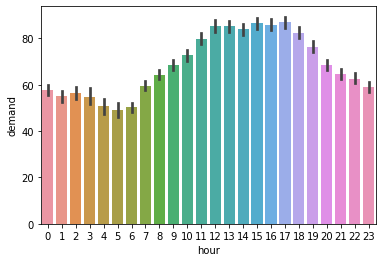

In [25]:
sns.barplot(train['hour'],train['demand'])

<AxesSubplot:xlabel='year', ylabel='demand'>

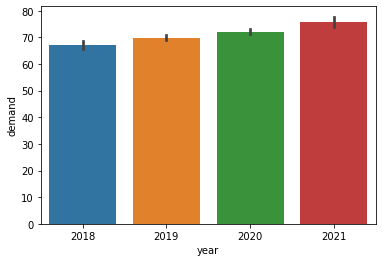

In [26]:
sns.barplot(train['year'],train['demand'])

<AxesSubplot:xlabel='month', ylabel='demand'>

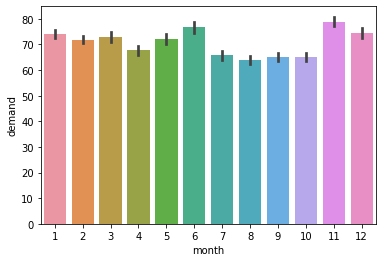

In [27]:
sns.barplot(train['month'],train['demand'])

<AxesSubplot:xlabel='quarter', ylabel='demand'>

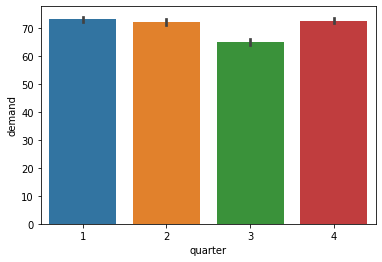

In [28]:
sns.barplot(train['quarter'],train['demand'])

<AxesSubplot:xlabel='dow', ylabel='demand'>

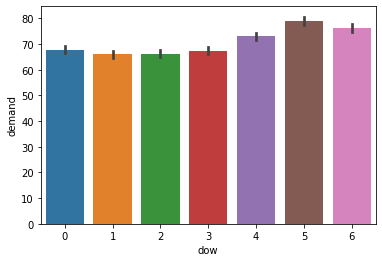

In [29]:
sns.barplot(train['dow'],train['demand'])

<AxesSubplot:xlabel='date'>

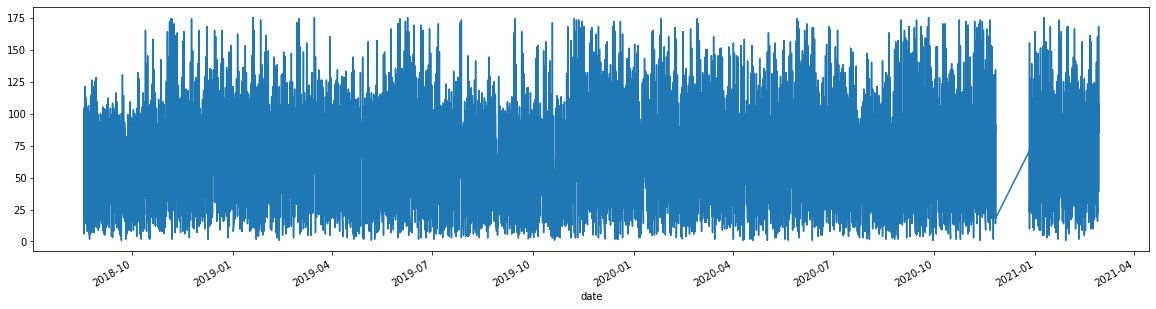

In [30]:
 train.demand.plot(figsize=(20, 5))


<AxesSubplot:>

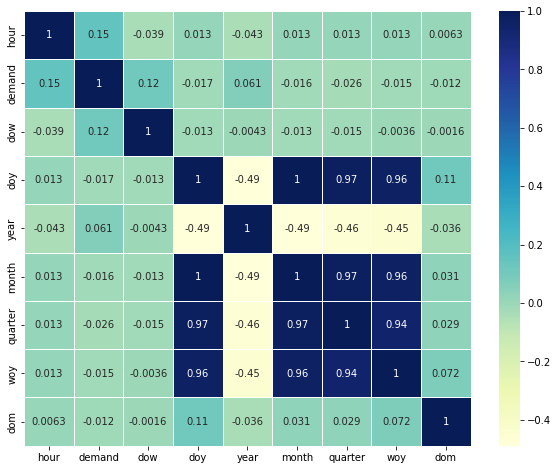

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), cmap ="YlGnBu", annot=True,linewidths = 0.5)

## Checking if Data is stationary, Auto Corretaion

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF_Test_Statistic','p_value','Lags_Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if label=='p_value':
            if value <= 0.05 :
                print("Data is stationary")
            else:
                print("Data is non-stationary ")

adfuller_test(train['demand'])

ADF_Test_Statistic : -17.126981274355003
p_value : 7.19246071697567e-30
Data is stationary
Lags_Used : 22


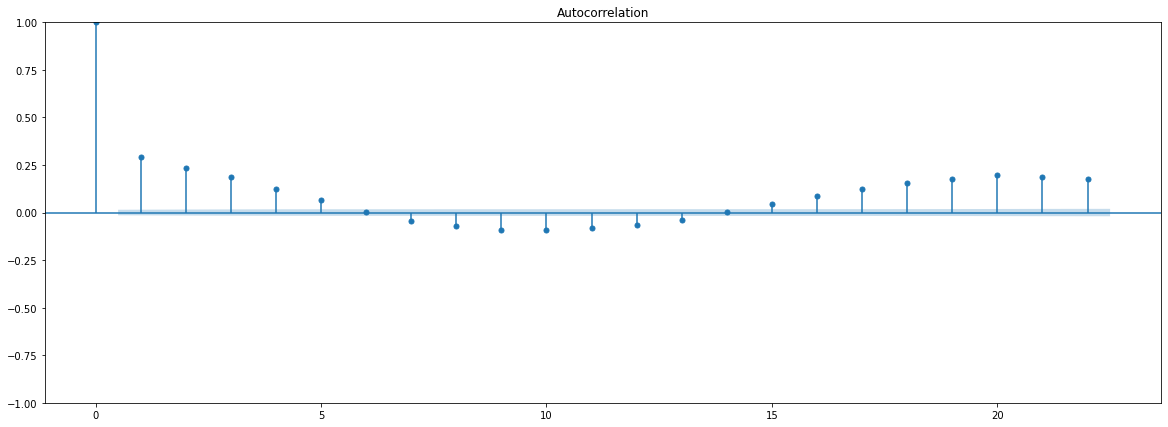

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize=(20,7))
plot_acf(train['demand'], lags=22)
plt.show()

## Seasonal Decompose

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal_decompose needs a dataframe with a datetime index
series = train[['demand']]
frequency = 24*365

# decomposing the time-series, with the frequency being 24 hours per 365 days
decomposed = seasonal_decompose(series, model='additive', period=frequency)

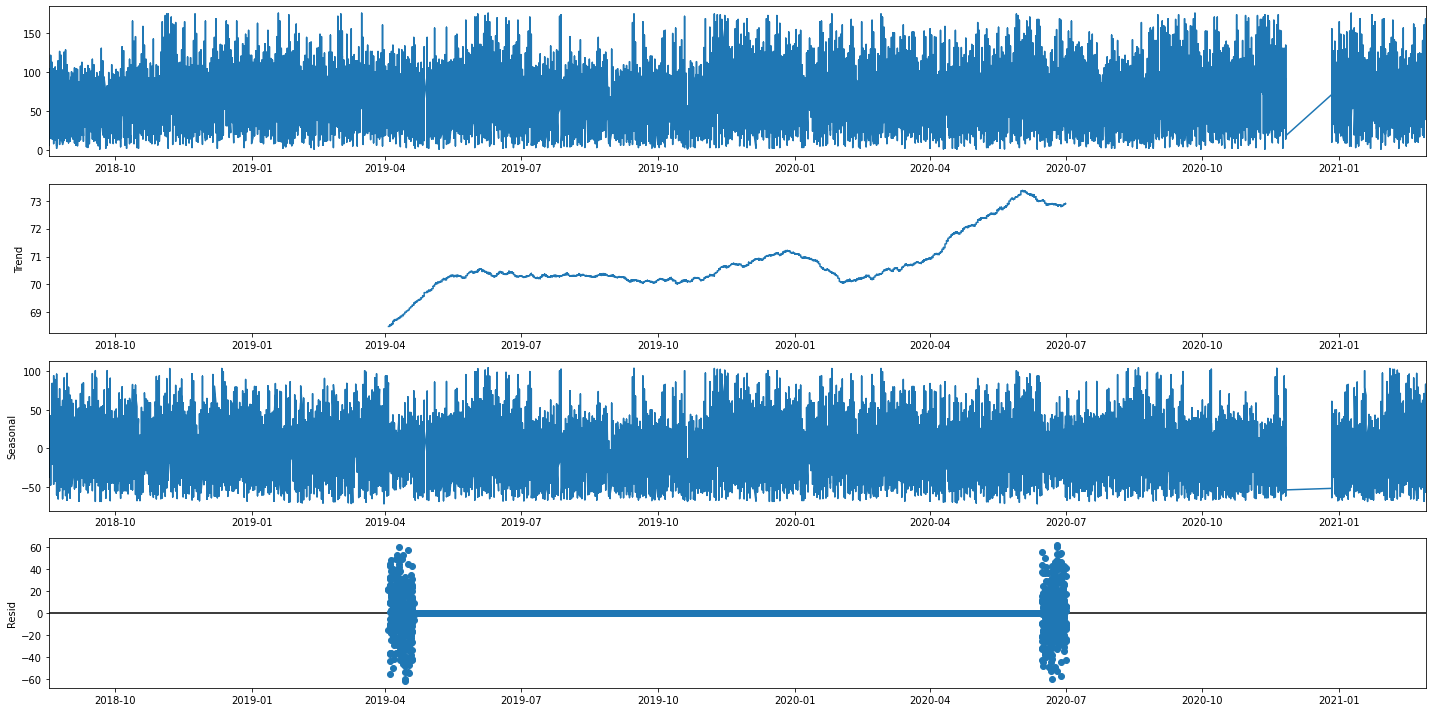

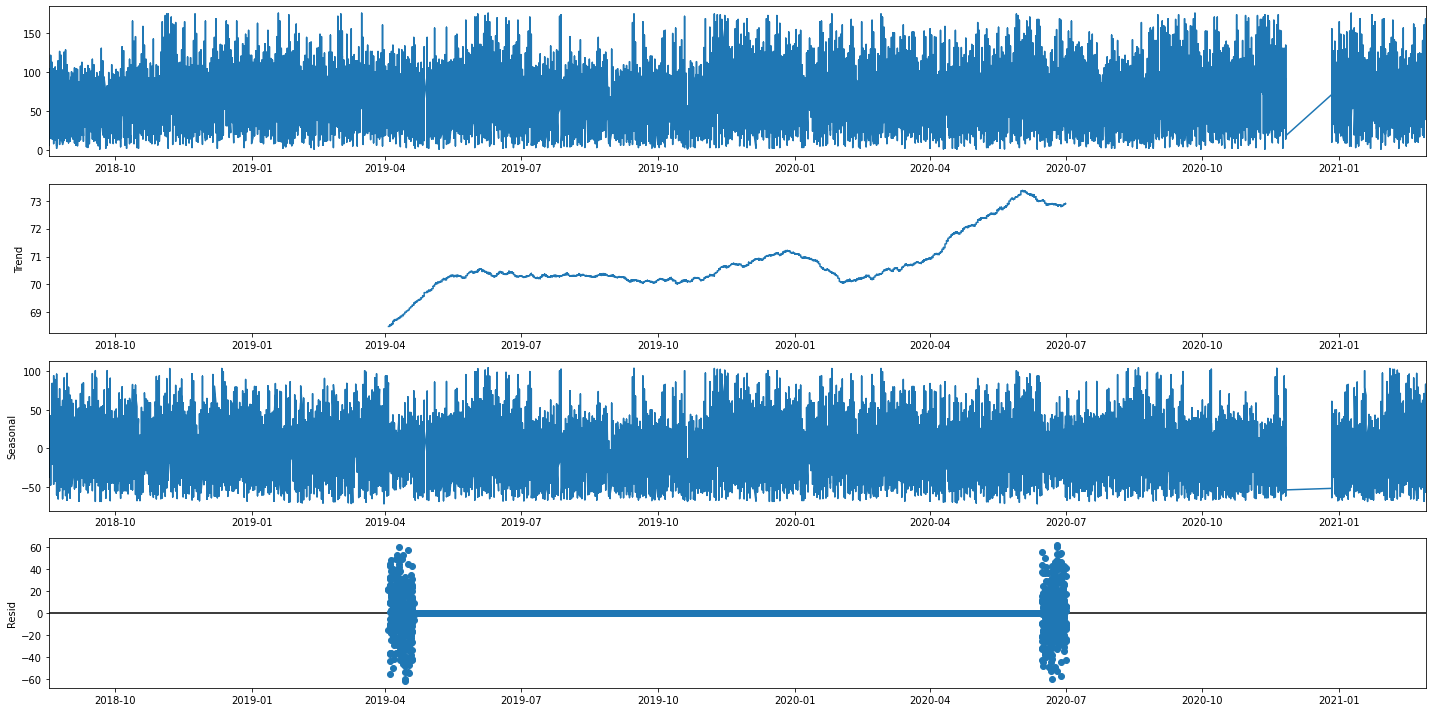

In [36]:
plt.rc("figure", figsize=(20,10))
decomposed.plot()

## Train_Test Data Split

In [37]:
CUTOFF_DATE = pd.to_datetime('2020-06-01')

In [38]:
train_data = train.loc[(train.index < CUTOFF_DATE)].copy()
test_data = train.loc[train.index >= CUTOFF_DATE].copy()

In [39]:
train_data.shape,test_data.shape

((12838, 9), (5022, 9))

In [40]:
train_data.columns

Index(['hour', 'demand', 'dow', 'doy', 'year', 'month', 'quarter', 'woy',
       'dom'],
      dtype='object')

In [41]:
# Removing date column
X_train=train_data[['hour', 'dow', 'doy', 'year', 'month', 'quarter', 'woy','dom']]
Y_train=train_data[['demand']]

In [42]:
# Removing date column
X_test=test_data[['hour', 'dow', 'doy', 'year', 'month', 'quarter', 'woy','dom']]
Y_test=test_data[['demand']]

In [43]:
X_test.min(),X_test.max()

(hour          0
 dow           0
 doy           1
 year       2020
 month         1
 quarter       1
 woy           1
 dom           1
 dtype: int64,
 hour         23
 dow           6
 doy         366
 year       2021
 month        12
 quarter       4
 woy          53
 dom          31
 dtype: int64)

# Building Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
from sklearn import metrics

## Linear Regression Model

In [45]:
lr = LinearRegression()  
lr.fit(X_train, Y_train)
lr_pred=lr.predict(X_test).round()

In [46]:
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(Y_test, lr_pred)))

Root Mean Squared Error for Linear Regression: 36.02531025394329


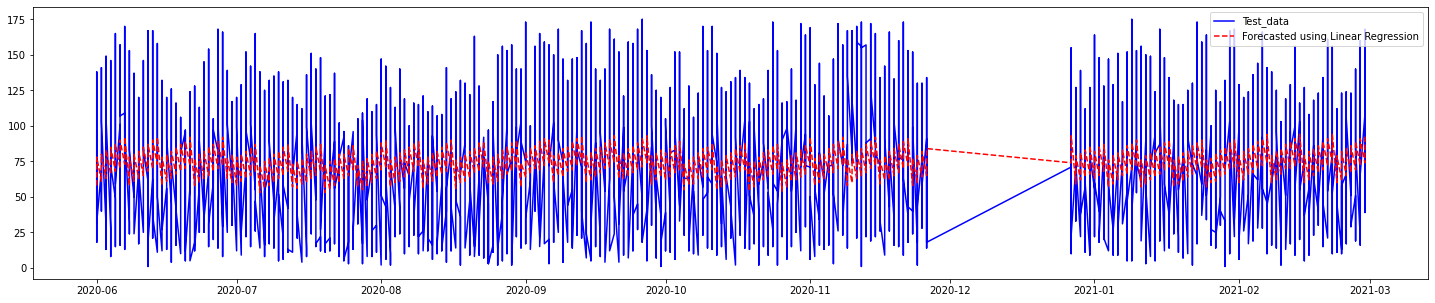

In [47]:
plt.figure(figsize=(25,5))
plt.plot(test_data.index,Y_test, color='blue',label = 'Test_data')
plt.plot(test_data.index,lr_pred, color='red',label = 'Forecasted using Linear Regression',linestyle='dashed')
plt.legend(loc = 'upper right')

## Decision Tree Model

In [48]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test).round()
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(Y_test, dt_pred)))

Root Mean Squared Error for DecisionTree: 45.7858372346556


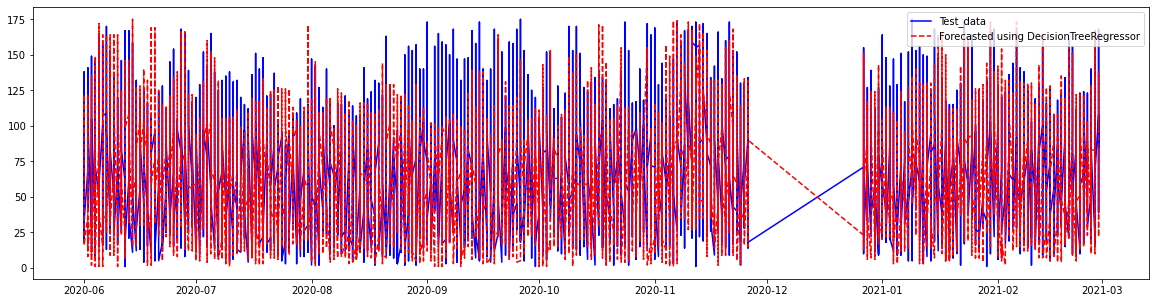

In [49]:
plt.figure(figsize=(20,5))
plt.plot(test_data.index,Y_test, color='blue',label = 'Test_data')
plt.plot(test_data.index,dt_pred, color='red',label = 'Forecasted using DecisionTreeRegressor',linestyle='dashed')
plt.legend(loc = 'upper right')

In [50]:
dt_pred

array([ 95.,  21.,  72., ..., 101.,  79.,  95.])

## Random Forest Regressor

In [51]:
for i in [10,50,100,500]:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0) 
    regressor.fit(X_train, Y_train)
    rf_pred = regressor.predict(X_test).round()
    print('Root Mean Squared Error for rf with ' +str(i)+' estimators:', np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)))

Root Mean Squared Error for rf with 10 estimators: 36.580903283895424
Root Mean Squared Error for rf with 50 estimators: 35.3458815436082
Root Mean Squared Error for rf with 100 estimators: 35.27869357883355
Root Mean Squared Error for rf with 500 estimators: 35.185917429342155


In [52]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
regressor.fit(X_train, Y_train)
rf_pred = regressor.predict(X_test).round()

In [53]:
print('Root Mean Squared Error for RandomForestRegressor:', np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)))

Root Mean Squared Error for RandomForestRegressor: 35.3458815436082


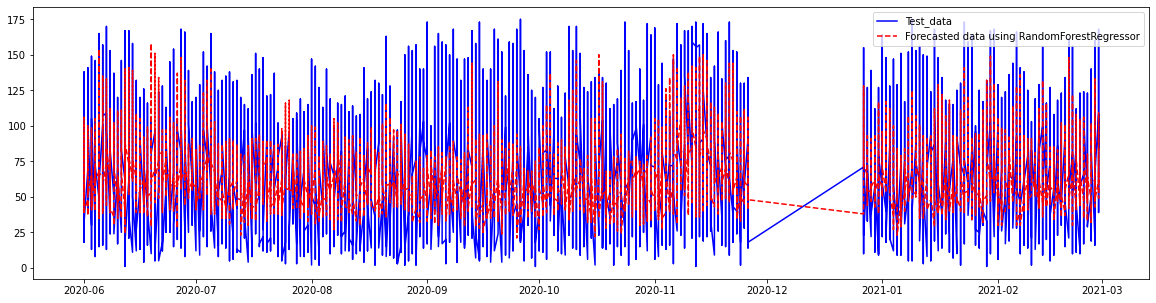

In [54]:
plt.figure(figsize=(20,5))
plt.plot(test_data.index,Y_test, color='blue',label = 'Test_data')
plt.plot(test_data.index,rf_pred, color='red',label = 'Forecasted data using RandomForestRegressor',linestyle='dashed')
plt.legend(loc = 'upper right')

In [55]:
rf_pred

array([59., 43., 52., ..., 76., 71., 67.])

## XG Boost Regressor

In [56]:
reg = xgb.XGBRegressor(learning_rate=0.1,n_estimators=50)
reg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
xgb_pred=reg.predict(X_test).round()

In [58]:
print('Root Mean Squared Error for XGBRegressor:', np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred)))

Root Mean Squared Error for XGBRegressor: 33.32557257326155


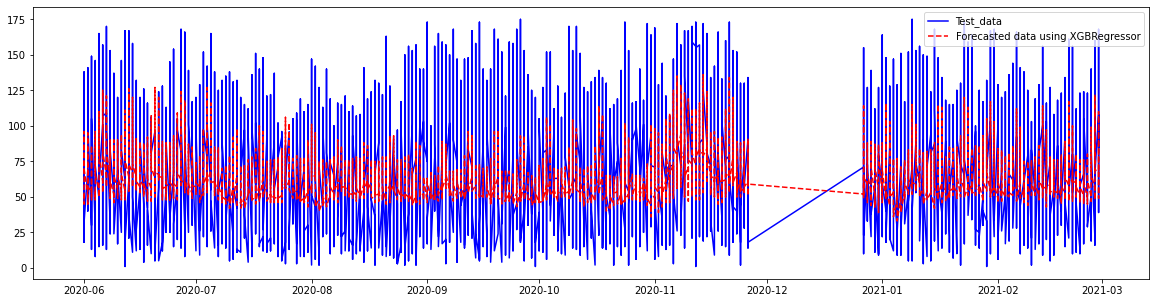

In [59]:
plt.figure(figsize=(20,5))
plt.plot(test_data.index,Y_test, color='blue',label = 'Test_data')
plt.plot(test_data.index,xgb_pred, color='red',label = 'Forecasted data using XGBRegressor',linestyle='dashed')
plt.legend(loc = 'upper right')

In [60]:
# Forecasting Test data using XGB Regressor:
test_demand=reg.predict(test).round()

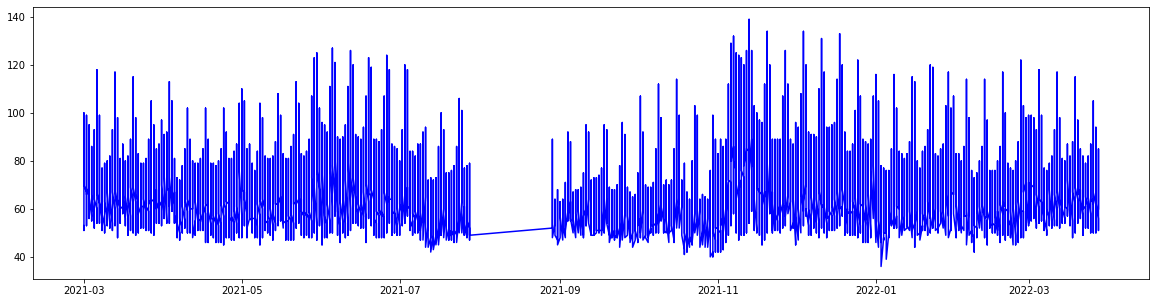

In [61]:
plt.figure(figsize=(20,5))
plt.plot(test.index,test_demand, color='blue',label = 'Forecasted data using XGBRegressor')

In [62]:
test=test.reset_index()
test

,date,hour,dow,doy,year,month,quarter,woy,dom
0,2021-03-01,0,0,60,2021,3,1,9,1
1,2021-03-01,1,0,60,2021,3,1,9,1
2,2021-03-01,2,0,60,2021,3,1,9,1
3,2021-03-01,3,0,60,2021,3,1,9,1
4,2021-03-01,5,0,60,2021,3,1,9,1
...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,19,0,87,2022,3,1,13,28
7646,2022-03-28,20,0,87,2022,3,1,13,28
7647,2022-03-28,21,0,87,2022,3,1,13,28
7648,2022-03-28,22,0,87,2022,3,1,13,28


In [63]:
submission = pd.DataFrame({
        "date": test['date'],
        "hour":test['hour'],
        "demand":test_demand
    })
submission.to_csv('./Hourly_forecast.csv', index=False)
print(submission)

           date  hour  demand
0    2021-03-01     0    53.0
1    2021-03-01     1    53.0
2    2021-03-01     2    53.0
3    2021-03-01     3    52.0
4    2021-03-01     5    51.0
...         ...   ...     ...
7645 2022-03-28    19    85.0
7646 2022-03-28    20    80.0
7647 2022-03-28    21    72.0
7648 2022-03-28    22    63.0
7649 2022-03-28    23    60.0

[7650 rows x 3 columns]
